In [1]:
import sys


path_to_modules = '..'
sys.path.append(path_to_modules)
path_to_modules = '../src/baseline'
sys.path.append(path_to_modules)


from src.baseline.utils import extract_numbers
from tqdm import tqdm
import networkx as nx
import os
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neighbors import NearestNeighbors
import csv

In [3]:
PATH = '../data/train/'

graphs = []
texts = []


for graph_dir in tqdm(sorted(os.listdir(f'{PATH}/graph'))):
    full_graph_path = f'{PATH}/graph/{graph_dir}'
    if 'edgelist' in full_graph_path:
        graphs.append(nx.read_edgelist(full_graph_path))
    else:
        graphs.append(nx.read_graphml(full_graph_path))

for text_dir in tqdm(sorted(os.listdir(f'{PATH}/description'))):
    full_text_path = f'{PATH}/description/{text_dir}'
    with open(full_text_path) as f:
        texts.append(f.readlines())

100%|██████████| 8000/8000 [00:40<00:00, 195.70it/s]


In [4]:
PATH = '../data/valid/'



for graph_dir in tqdm(sorted(os.listdir(f'{PATH}/graph'))):
    full_graph_path = f'{PATH}/graph/{graph_dir}'
    if 'edgelist' in full_graph_path:
        graphs.append(nx.read_edgelist(full_graph_path))
    else:
        graphs.append(nx.read_graphml(full_graph_path))

for text_dir in tqdm(sorted(os.listdir(f'{PATH}/description'))):
    full_text_path = f'{PATH}/description/{text_dir}'
    with open(full_text_path) as f:
        texts.append(f.readlines())

  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 1000/1000 [00:06<00:00, 163.82it/s]


In [5]:
train_np = np.array([extract_numbers(i[0]) for i in texts])


In [6]:
test = []
# read test_set
TEST_PATH = '../data/test/test.txt'

with open(TEST_PATH) as f:
    test = f.readlines()
test_np = np.array([extract_numbers(i)[1:] for i in test])

In [7]:
# Generally we should rescale while using metrics methods. 
# But here our target metric is L1 in the original (not resacaled setting)
# So, i guess it is better not to rescale
nn = NearestNeighbors(n_neighbors=1).fit(train_np)

In [8]:
_, indices_neigh = nn.kneighbors(test_np)
indices_neigh = list(indices_neigh.reshape(-1))

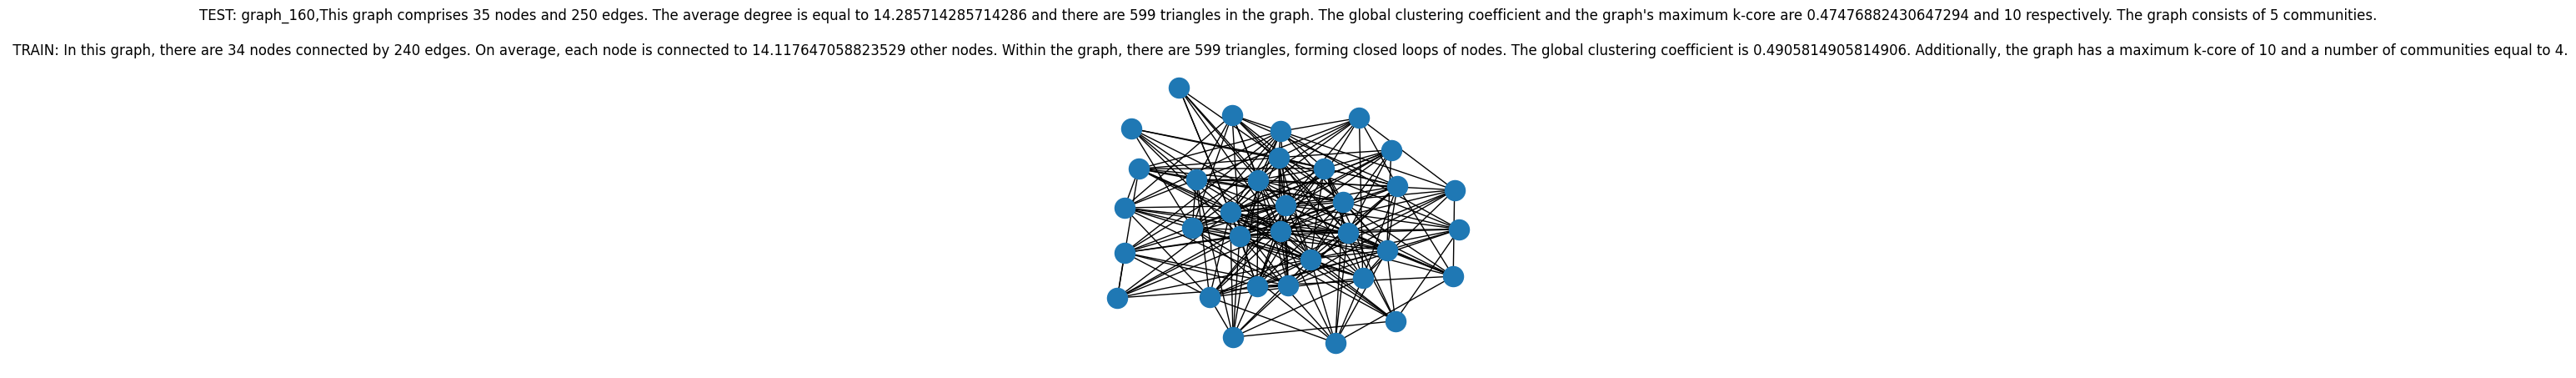

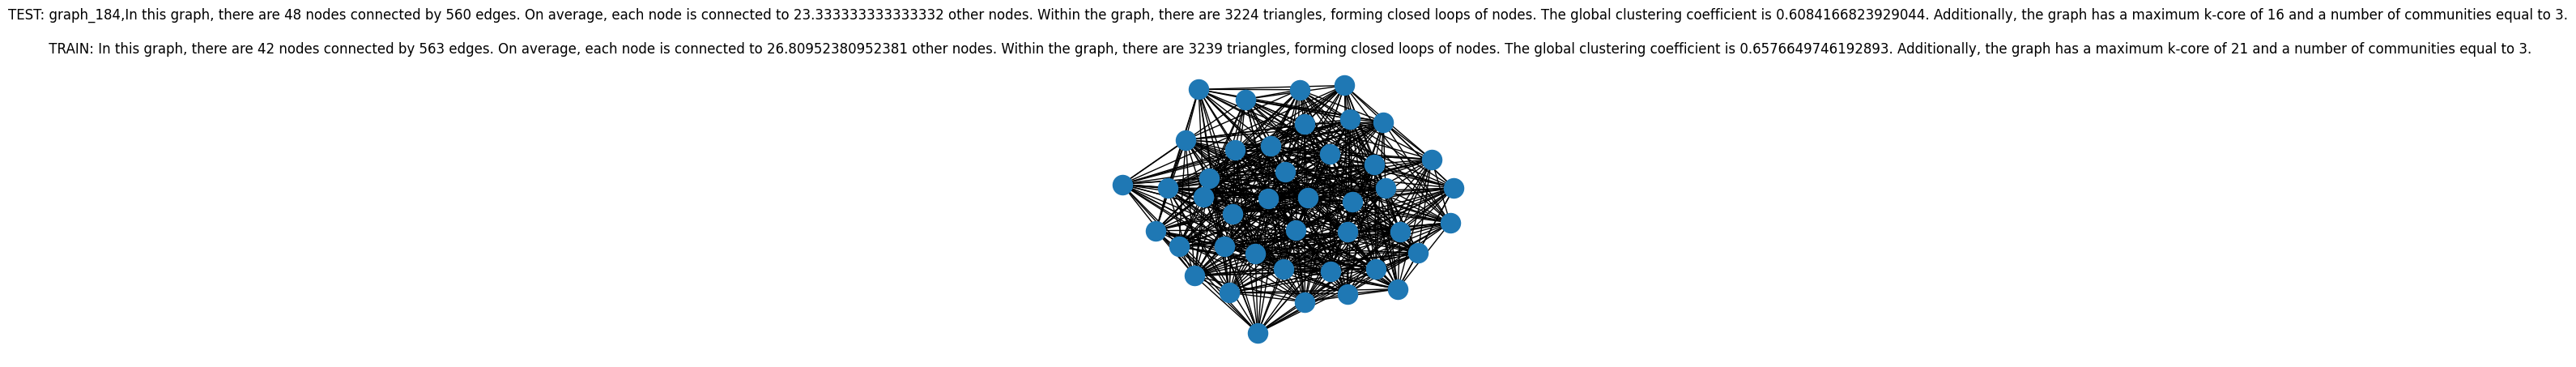

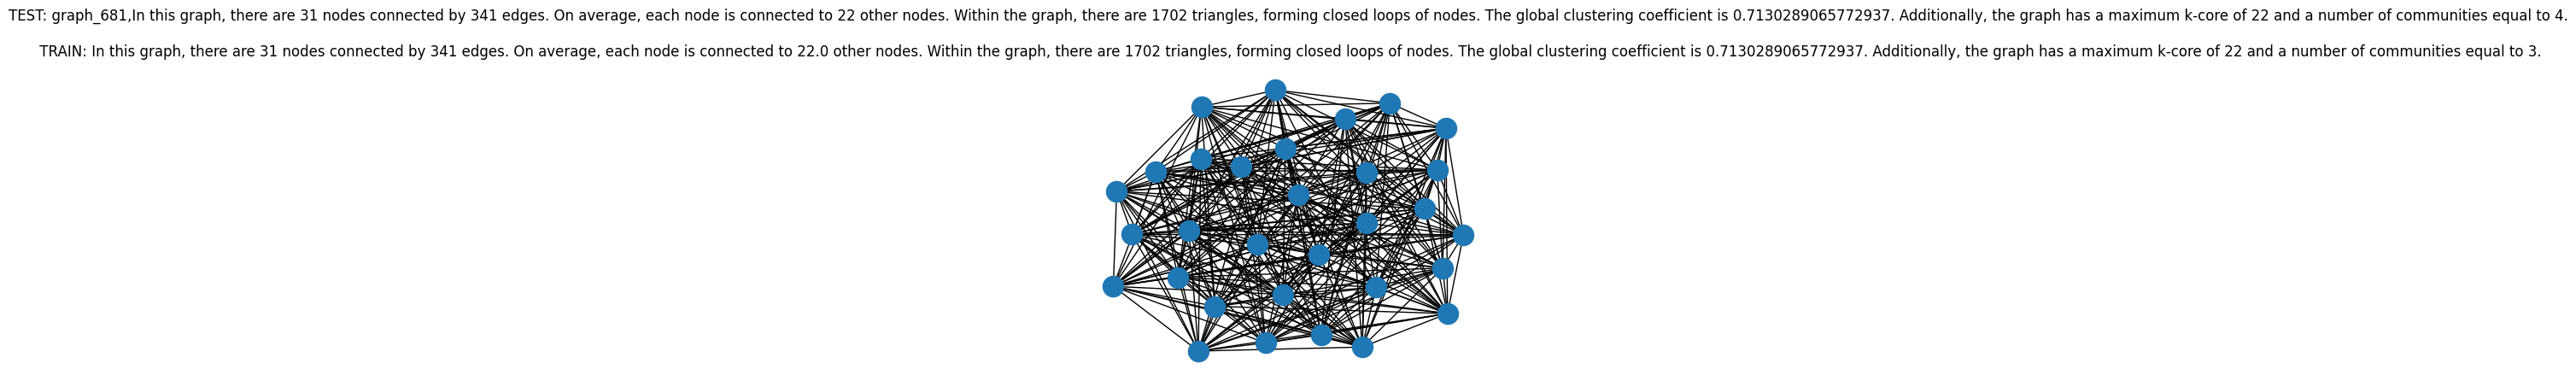

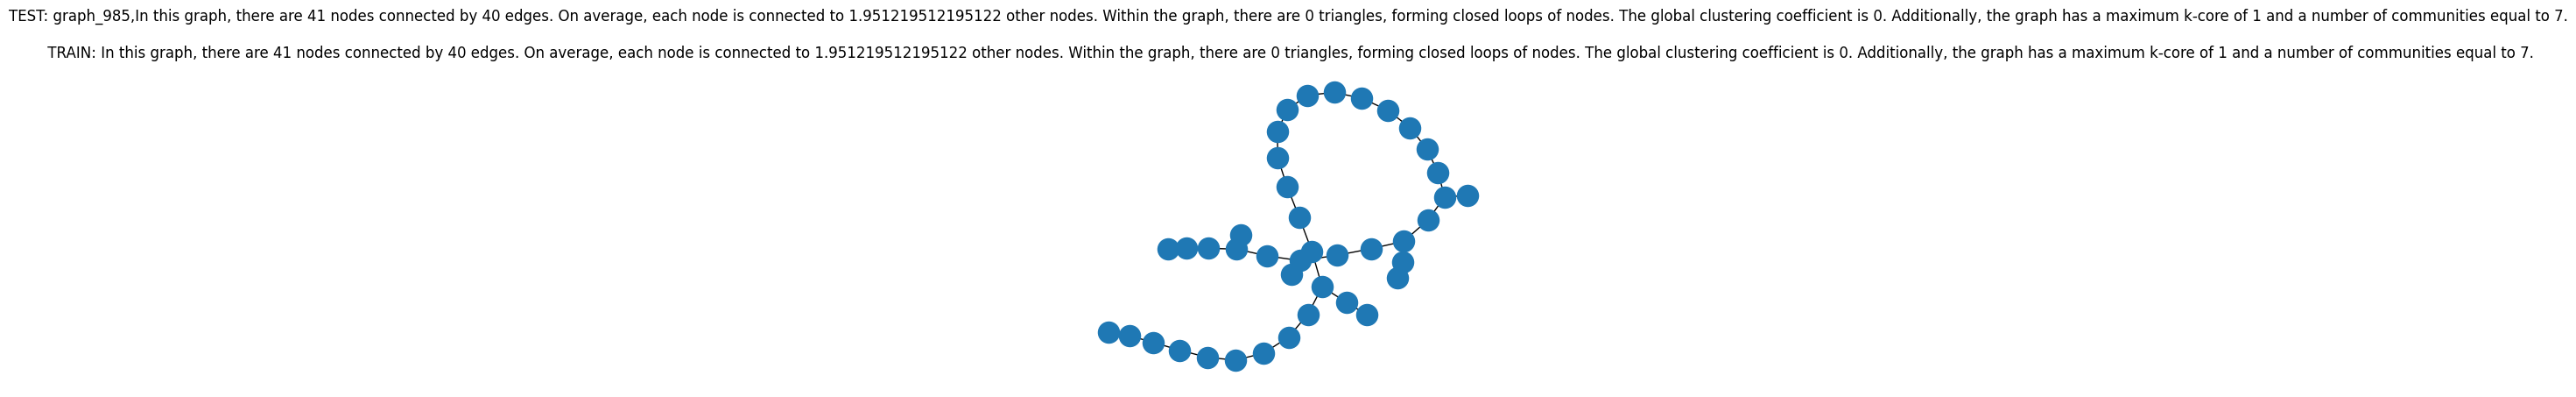

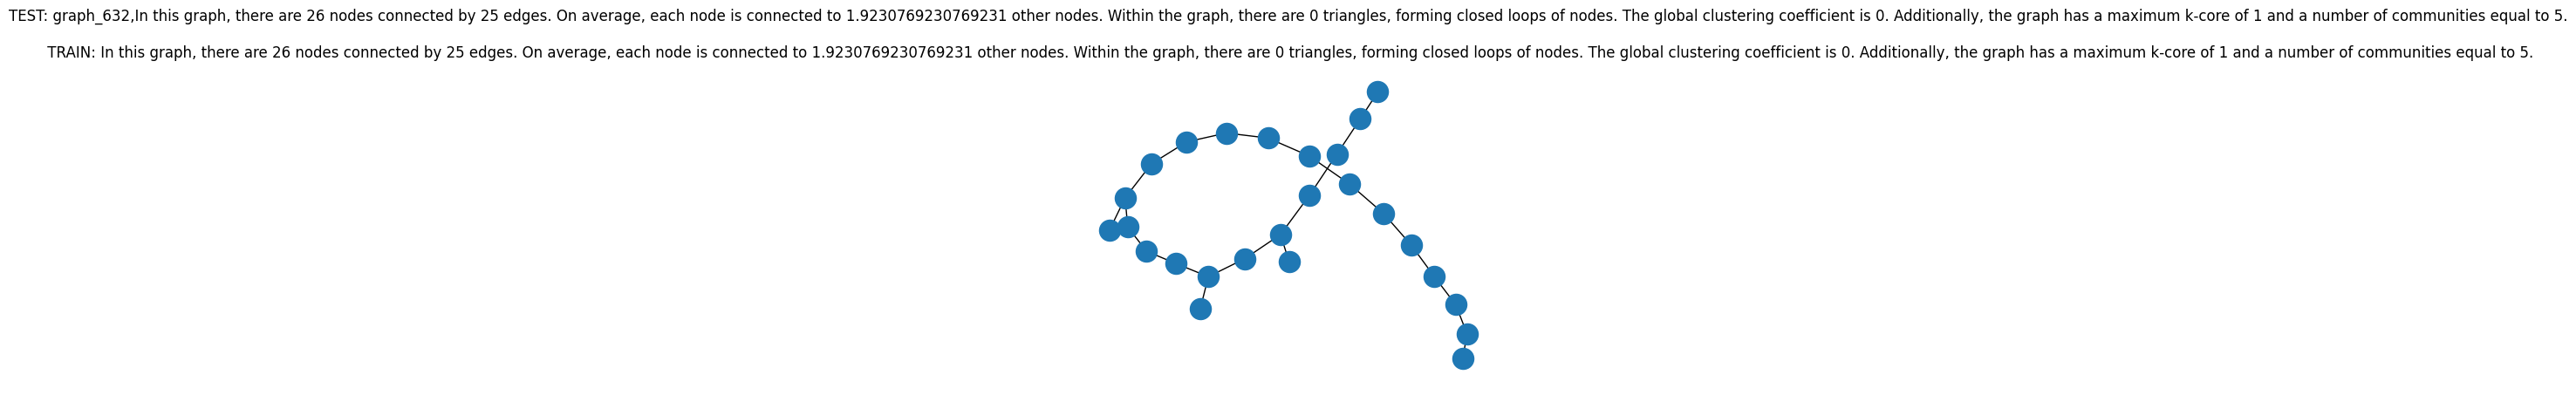

In [9]:
# Let's sample a cople and try to draw them
n_sample = 5

indices_together = list(zip(range(len(indices_neigh)), indices_neigh))
sampled_ind = np.random.choice(range(len(indices_together)), n_sample)

for ind, neigh_ind in [indices_together[i] for i in sampled_ind]:
    plt.title(f'TEST: {test[ind]} \n TRAIN: {texts[neigh_ind][0]}')
    nx.draw(graphs[neigh_ind])
    plt.show()
    

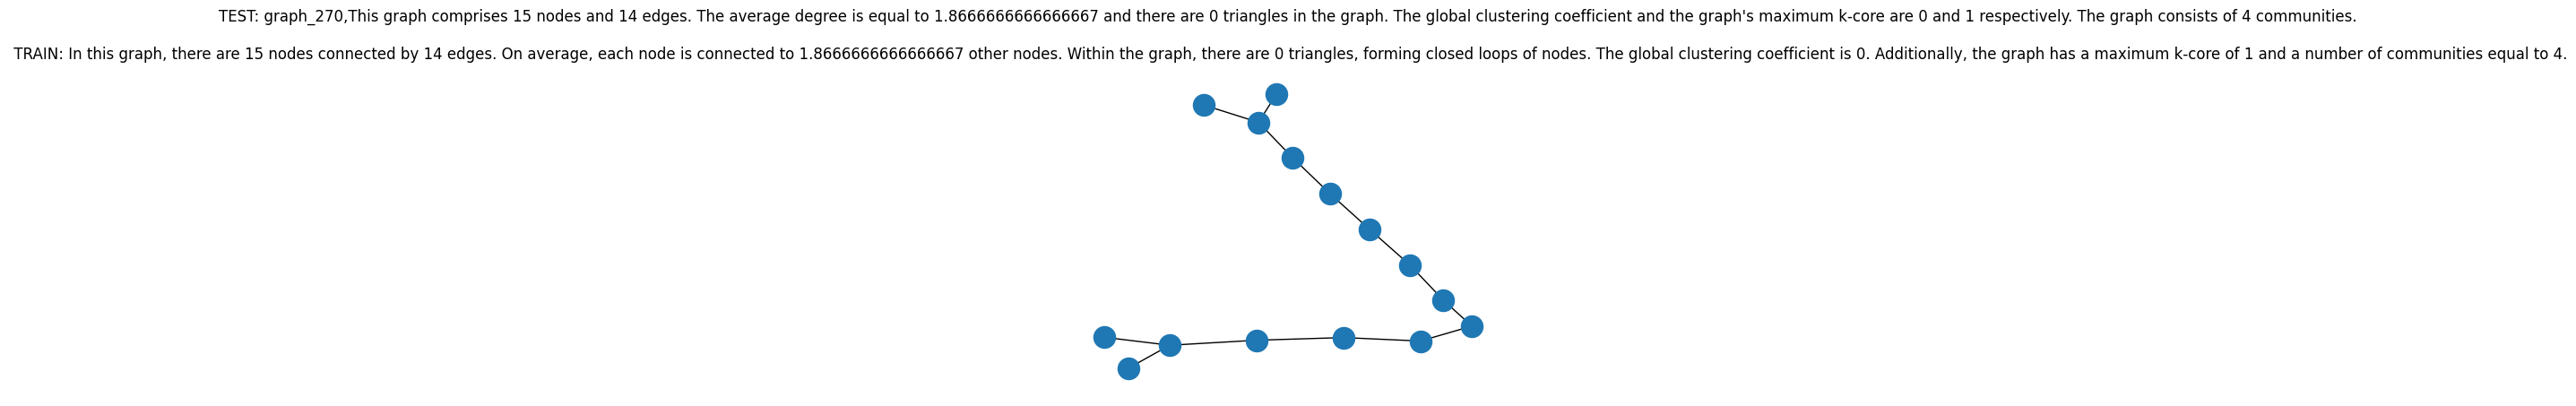

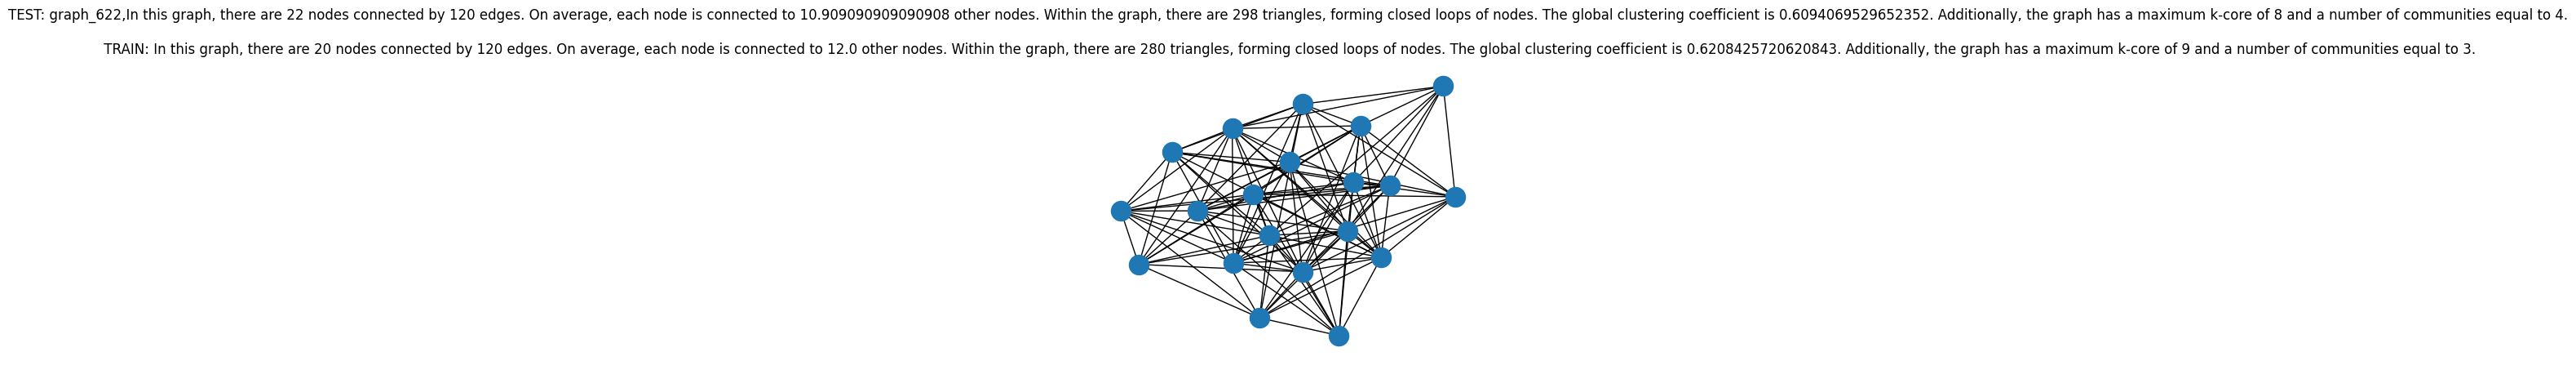

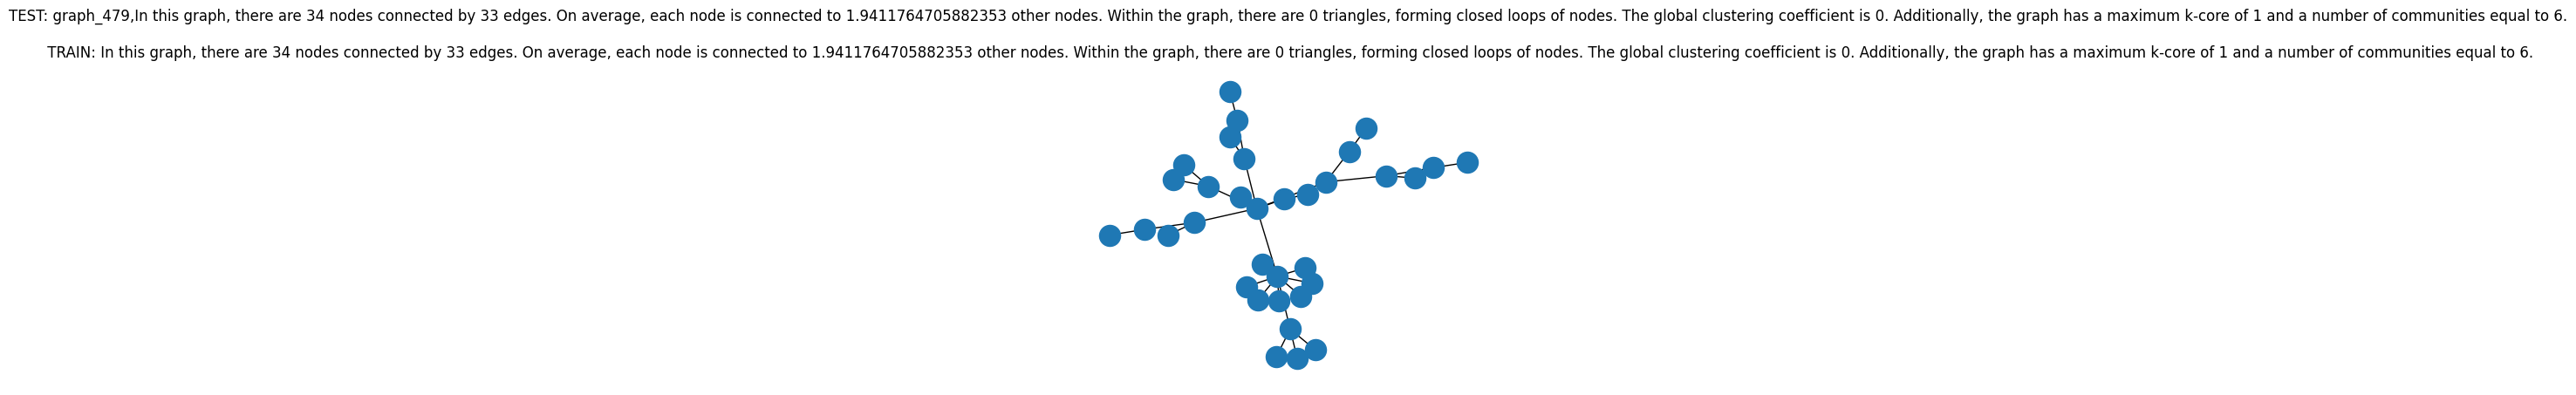

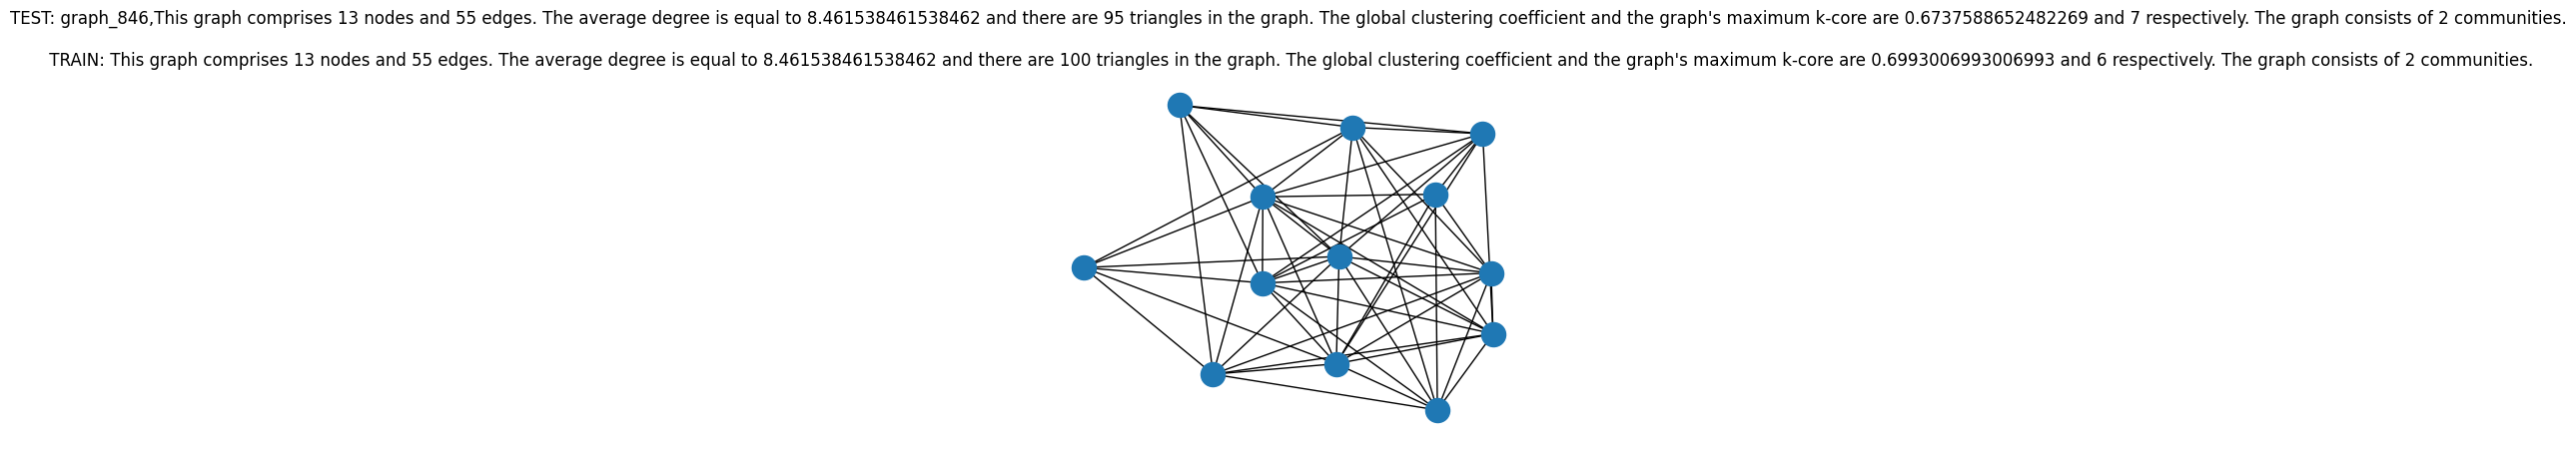

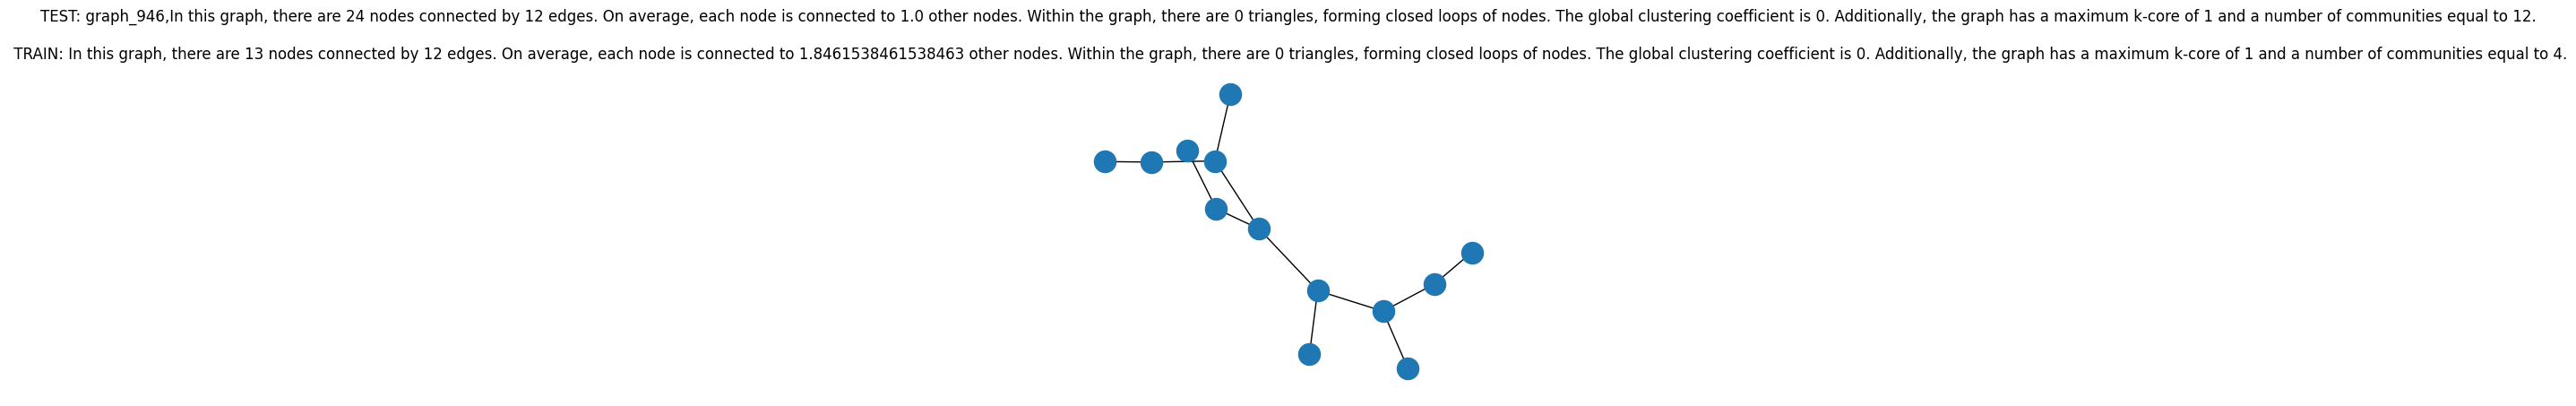

In [10]:
# Let's try to find neigherest neighbours using only edges and num of triangles. The motivatattion for that is we have L1-metrics. These components due to their scale affet it the most.


nn = NearestNeighbors(n_neighbors=1).fit(train_np[:, [1, 4]])
_, indices_neigh = nn.kneighbors(test_np[:, [1, 4]])
indices_neigh = list(indices_neigh.reshape(-1))
n_sample = 5

indices_together = list(zip(range(len(indices_neigh)), indices_neigh))
sampled_ind = np.random.choice(range(len(indices_together)), n_sample)

for ind, neigh_ind in [indices_together[i] for i in sampled_ind]:
    plt.title(f'TEST: {test[ind]} \n TRAIN: {texts[neigh_ind][0]}')
    nx.draw(graphs[neigh_ind])
    plt.show()
    

In [11]:
# Let's compute the metrics
# Looks too great
# Let's try to submit it

pred_np = np.array([extract_numbers(texts[ind][0]) for ind in indices_neigh])
np.mean(np.abs(pred_np - test_np))

20.552513533424108

In [11]:
# Let's submit and try
# idk how can we submit ...

In [12]:
pred_graphs = [graphs[ind] for ind in indices_neigh]


with open("baseline_neigh.csv", "w", newline="") as csvfile:
    writer = csv.writer(csvfile)
    # Write the header
    writer.writerow(["graph_id", "edge_list"])
    for i, g in enumerate(pred_graphs):
        graph_id = f'graph_{i}'
        edge_list_text = ", ".join([f"({u}, {v})" for u, v in g.edges()])
        writer.writerow([graph_id, edge_list_text])